#Post Test - Adaline

Adaline (adaptive **linear** layout) secara sederhana dapat dipahami sebagai Jaringan Syaraf Tiruan dengan neuron tunggal (neuron input tidak dihitung) dengan fungsi aktivasi **linear**.

Pada praktikum sebelumnya, kita sudah menerapkan Adaline dengan fungsi aktivasi bipolar pada pengujiannya. Hal ini dikarenakan sebelumnya kita menggunakan Adaline untuk kasus klasifikasi.

Pada Post Test kali ini, teman-teman akan menerapkan Adaline untuk kasus regresi linear sederhana.

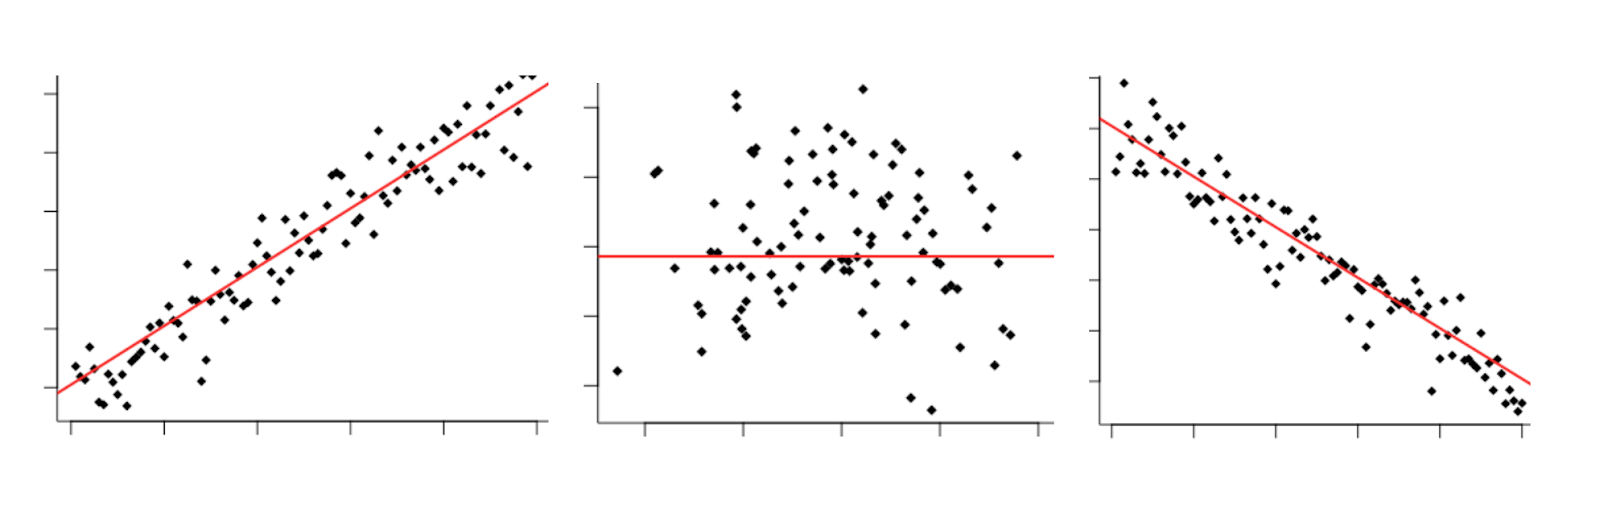

## Kode (jangan diubah)

Fungsi Training Adaline

In [10]:
import sys
import numpy as np

def train_adaline(inputs, targets, learning_rate=0.1, tolerance=0.1, max_iterations=-1, show_progress=False):
    weights = np.random.uniform(0, 1, len(inputs[0]) + 1)
    bias_term = np.ones((len(inputs), 1))
    inputs = np.hstack((bias_term, inputs))
    training_complete = False
    iteration_count = 0

    while not training_complete and (max_iterations == -1 or iteration_count < max_iterations):
        iteration_count += 1
        largest_change = -sys.maxsize

        if show_progress:
            print('\nIteration', iteration_count)

        for idx, input_row in enumerate(inputs):
            predicted_output = np.dot(input_row, weights)

            # Lengkapi bagian dibawah ini
            for i in range(len(input_row)):
                new_weight = weights[i] + learning_rate * (targets[idx] - predicted_output) * input_row[i]
                largest_change = max(abs(weights[i] - new_weight), largest_change)
                weights[i] = new_weight

            if show_progress:
                print('Weights:', weights)

        #Clue : Hentikan iterasi jika perubahan terbesar lebih kecil dari toleransi
        training_complete = True if largest_change < tolerance else False

    return weights, iteration_count


## Masalah

Diketahui terdapat persamaan linear 1 variabel yang memetakan x ke f(x). Teman-teman harus bisa menerapkan Adaline untuk menyelesaikan permasalahan linear berdasarkan data yang diberikan.

Berikut beberapa petunjuk yang bisa diperhatikan.

1.   Buat fungsi aktivasi linear dengan nama linstep().
2.   Gunakan fungsi linstep pada fungsi pengujian.
3.   Nilai output / hasil prediksi tidak harus sama persis dengan hitungan matematikanya, tetapi setidaknya mendekati.
4.   Teman-teman bebas menentukan epoch, learning rate, dan parameter lainnya selama proses training berjalan dan menghasilkan prediksi yang sesuai.



Data

In [11]:
# pada x(fitur), indeks kedua di tuple akan selalu 0, karena kita hanya menggunakan 1 fitur dan fungsi train dari modul tetap dapat digunakan

x = (1,0),(2,0),(3,0),(4,0),(5,0),(6,0),(7,0),(8,0),(9,0),(10,0)
fx = 12,20,28,36,44,52,60,68,76,84

Buat fungsi aktivasi linear bernama linstep()

In [13]:
#Lengkapi Coding Dibawah ini
def linstep(y, th_lower=-1, th_upper=1):

    # Mengembalikan nilai itu sendiri karean ini adalah permasalahan regresi linear bukan klasifikasi
    return y 

Buat fungsi pengujian bernama adaline_predict()

In [14]:
#Lengkapi Codingan dibawah ini:
import sys

def adaline_predict(X, w):
    Y = []

    for x in X:
        y_in = w[0] + np.dot(x, w[1:])
        y = linstep(y_in)
        Y.append(y)
    
    return Y

Uji dengan nilai x: 11, 12, 13, 14 dan 15!

In [15]:
x_test = [(11,0), (12,0), (13,0), (14,0), (15,0)]

# Melatih model Adaline
weights, iteration_count = train_adaline(inputs=x, targets=fx, show_progress=True, max_iterations=2, tolerance=.1, learning_rate=0.1)

# Menggunakan bobot hasil pelatihan untuk prediksi
output = adaline_predict(x_test, weights)

# Menampilkan hasil
print('\nOutput:', output)
print('Iterations:', iteration_count)


Iteration 1
Weights: [1.31346074 1.2735945  0.57965505]
Weights: [2.92739577 4.50146455 0.57965505]
Weights: [4.08421682 7.97192773 0.57965505]
Weights: [4.08702405 7.98315664 0.57965505]
Weights: [4.08674333 7.98175302 0.57965505]
Weights: [4.08901718 7.99539615 0.57965505]
Weights: [4.08333816 7.955643   0.57965505]
Weights: [4.11048995 8.17285728 0.57965505]
Weights: [3.9438694  6.67327237 0.57965505]
Weights: [ 5.27621009 19.99667924  0.57965505]

Iteration 2
Weights: [ 3.94892116 18.6693903   0.57965505]
Weights: [ 1.82015098 14.41184995  0.57965505]
Weights: [0.1145809  9.2951397  0.57965505]
Weights: [-0.01493307  8.77708382  0.57965505]
Weights: [-1.98167639e-03  8.84184081e+00  5.79655052e-01]
Weights: [-0.10688799  8.21240291  0.57965505]
Weights: [ 0.15511877 10.04645024  0.57965505]
Weights: [-1.0975533   0.02507368  0.57965505]
Weights: [ 6.58963572 69.20977485  0.57965505]
Weights: [ -54.8791027  -545.47760935    0.57965505]

Output: [-6055.132805524474, -6600.6104148719

## Fungsi Linear referensi
Berdasarkan data _training_ yang ada, dapat didefinisikan model linear yang bisa memetakan X _train_ ke y _train_ sebagai berikut:

$$
f(x) = 8x + 4
$$

Hal ini didapatkan dengan melakukan eliminasi terhadap dua data poin yang bersebalahan untuk mendapatkan nilai $x$, dan melakukan substitusi nilai $x$ tersebut ke salah satu data poin untuk mendapatkan selisih. Selisih ini merupakan nilai dari bias/intercept.

## Hyperparameter Tuning

In [16]:
# Scoring: menggunakan root mean squared error (RMSE)
from sklearn.metrics import mean_squared_error

# RMSE Calculation function
def calculate_rmse(actual, predicted):
    return np.sqrt(mean_squared_error(actual, predicted))


In [24]:
# Mendefinisikan search space untuk parameter grid
learning_rate_grid = [0.01, 0.05]
tolerance_grid = [0.01, 0.05, 0.1]
max_iterations_grid = [2, 5, 10, 100, -1]

In [25]:
# Mendefinisikan data aktual menggunakan reference linear model
def actual_linear_model(x):
    return 8*x + 4
# Display the best result

fx_test = [actual_linear_model(x[0]) for x in x_test]
print("fx_test: ", fx_test)

fx_test:  [92, 100, 108, 116, 124]


In [26]:
import itertools

grid_search_results = []

for learning_rate, tolerance, max_iterations in itertools.product(learning_rate_grid, tolerance_grid, max_iterations_grid):
    print(f"\nTraining with learning_rate={learning_rate}, tolerance={tolerance}, max_iterations={max_iterations}")
    
    weights, iteration_count = train_adaline(inputs=x, targets=fx, 
                                             learning_rate=learning_rate, 
                                             tolerance=tolerance, 
                                             max_iterations=max_iterations, 
                                             show_progress=False)
    
    # P
    output = adaline_predict(x_test, weights)
    rmse = calculate_rmse(fx_test, output)
    grid_search_results.append({
        'learning_rate': learning_rate,
        'tolerance': tolerance,
        'max_iterations': max_iterations,
        'rmse': rmse,
        'iterations': iteration_count,
        'weights': weights,
        'predicted_output': output
    })

sorted_results = sorted(grid_search_results, key=lambda x: x['rmse'])

best_result = sorted_results[0]


Training with learning_rate=0.01, tolerance=0.01, max_iterations=2

Training with learning_rate=0.01, tolerance=0.01, max_iterations=5

Training with learning_rate=0.01, tolerance=0.01, max_iterations=10

Training with learning_rate=0.01, tolerance=0.01, max_iterations=100

Training with learning_rate=0.01, tolerance=0.01, max_iterations=-1

Training with learning_rate=0.01, tolerance=0.05, max_iterations=2

Training with learning_rate=0.01, tolerance=0.05, max_iterations=5

Training with learning_rate=0.01, tolerance=0.05, max_iterations=10

Training with learning_rate=0.01, tolerance=0.05, max_iterations=100

Training with learning_rate=0.01, tolerance=0.05, max_iterations=-1

Training with learning_rate=0.01, tolerance=0.1, max_iterations=2

Training with learning_rate=0.01, tolerance=0.1, max_iterations=5

Training with learning_rate=0.01, tolerance=0.1, max_iterations=10

Training with learning_rate=0.01, tolerance=0.1, max_iterations=100

Training with learning_rate=0.01, tolera

In [27]:
print(best_result)

{'learning_rate': 0.05, 'tolerance': 0.01, 'max_iterations': -1, 'rmse': 0.12441700669734676, 'iterations': 51, 'weights': array([4.13907839, 7.97998216, 0.5719302 ]), 'predicted_output': [91.91888219783002, 99.89886436229784, 107.87884652676567, 115.8588286912335, 123.83881085570133]}


## Analisis Hasil

1. Dari data dan hasil pengujian regresi, jabarkan fungsi linear yang sesuai!

2. Bagaimana teman-teman melakukan tuning JST Adaline hingga bisa melakukan regresi dengan cukup baik?

1. Dari data hasil pengujian regresi, dapat didefinisikan sebuah fungsi linear yang mampu memetakan data pada `x` menuju data pada `fx`, yaitu $f(x) = 8x + 4$. Fungsi ini didapatkan dengan melakukan eliminasi antara data poin untuk mencari nilai koefisien `x` (gradien) dan melakukan substitusi nilai gradien ke salah satu data poin untuk mendapatkan nilai bias/intercept `c`.

2. Dari hasil prediksi Adaline dengan default value untuk max_iterations=-1, learning_rate=.1, dan error_tolerance=.1 sebagai stopping criteria, didapatkan jika hasil prediksi memiliki nilai error yang sangat tinggi. Hal ini dikarenakan nilai dari learning_rate yang digunakan senilai .1 terlalu tinggi.

Hyperparameter tuning dilakukan dengan melakukan Grid Search pada hyperparameter search space yang didefinisikan sebagai berikut:
- learning_rate_grid = [0.01, 0.05]
- tolerance_grid = [0.01, 0.05, 0.1]
- max_iterations_grid = [2, 5, 10, 100, -1]

Secara exhaustive dengan penilaian error menggunakan RSME, didapatkan jika hyperparameter optimal untuk model Adaline di atas adalah sebagai berikut:
- learning_rate = 0.05
- tolerance_grid = 0.01
- max_iterations = -1
Dengan RMSE 0.124.

Output yang diberikan setelah hyperparameter tuning: [91.91888219783002, 99.89886436229784, 107.87884652676567, 115.8588286912335, 123.83881085570133]